In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv", index_col=0)


In [3]:
cols = []
for i in df.columns:
    if df.describe()[i].loc["mean"] == 0:
        cols.append(i)
        
    
    

In [4]:
df.describe()["1"].loc["max"]

0.0

In [5]:
df =df.drop(cols, axis=1)

In [6]:
df

,0,3,5,6,7,17,20,26,27,31,...,78,81,82,84,85,88,91,92,99,tar
0,0.000000,-0.301511,0.0,0.301511,-0.301511,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,-0.603023,0.0,0.000000,26
1,0.117382,-0.479311,0.0,0.039127,-0.117382,0.048909,-0.136946,0.0,0.009782,0.0,...,0.313019,0.176073,0.0,-0.117382,-0.068473,0.0,-0.254328,0.0,0.000000,26
2,0.111789,-0.287458,0.0,0.015970,-0.071864,0.007985,-0.167684,0.0,0.000000,0.0,...,0.295443,0.183654,0.0,-0.223578,-0.007985,0.0,-0.319398,0.0,0.039925,26
3,0.329293,-0.219529,0.0,0.000000,-0.219529,0.109764,-0.109764,0.0,0.000000,0.0,...,0.219529,0.109764,0.0,-0.109764,0.000000,0.0,-0.219529,0.0,0.000000,26
4,0.447214,-0.670820,0.0,0.000000,0.000000,0.000000,-0.447214,0.0,0.000000,0.0,...,0.223607,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,0.142857,-0.428571,0.0,0.142857,0.000000,0.000000,-0.142857,0.0,0.000000,0.0,...,0.428571,0.142857,0.0,-0.142857,0.000000,0.0,-0.428571,0.0,0.000000,96
1879,0.194257,-0.485643,0.0,0.000000,0.000000,0.097129,-0.097129,0.0,0.000000,0.0,...,0.388514,0.194257,0.0,-0.097129,-0.097129,0.0,-0.388514,0.0,0.000000,96
1880,0.000000,-0.401610,0.0,0.080322,0.000000,0.080322,-0.160644,0.0,0.000000,0.0,...,0.562254,0.080322,0.0,-0.080322,-0.240966,0.0,-0.321288,0.0,0.000000,96
1881,0.000000,-0.212000,0.0,0.000000,-0.317999,0.000000,-0.317999,0.0,0.000000,0.0,...,0.106000,0.106000,0.0,-0.317999,0.000000,0.0,-0.423999,0.0,0.000000,96


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["tar"], axis=1), df["tar"], test_size=0.4, random_state=42)

In [9]:
from sklearn.decomposition import PCA 


In [10]:
pca = PCA(n_components=37)

In [11]:
pca_feat = pca.fit_transform(X_train)

In [12]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, MeanShift

In [13]:
kmeans = KMeans(n_clusters=37, random_state=0, init="k-means++")

In [14]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=37, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [15]:
kmeans_pred = kmeans.fit_predict(X_train)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

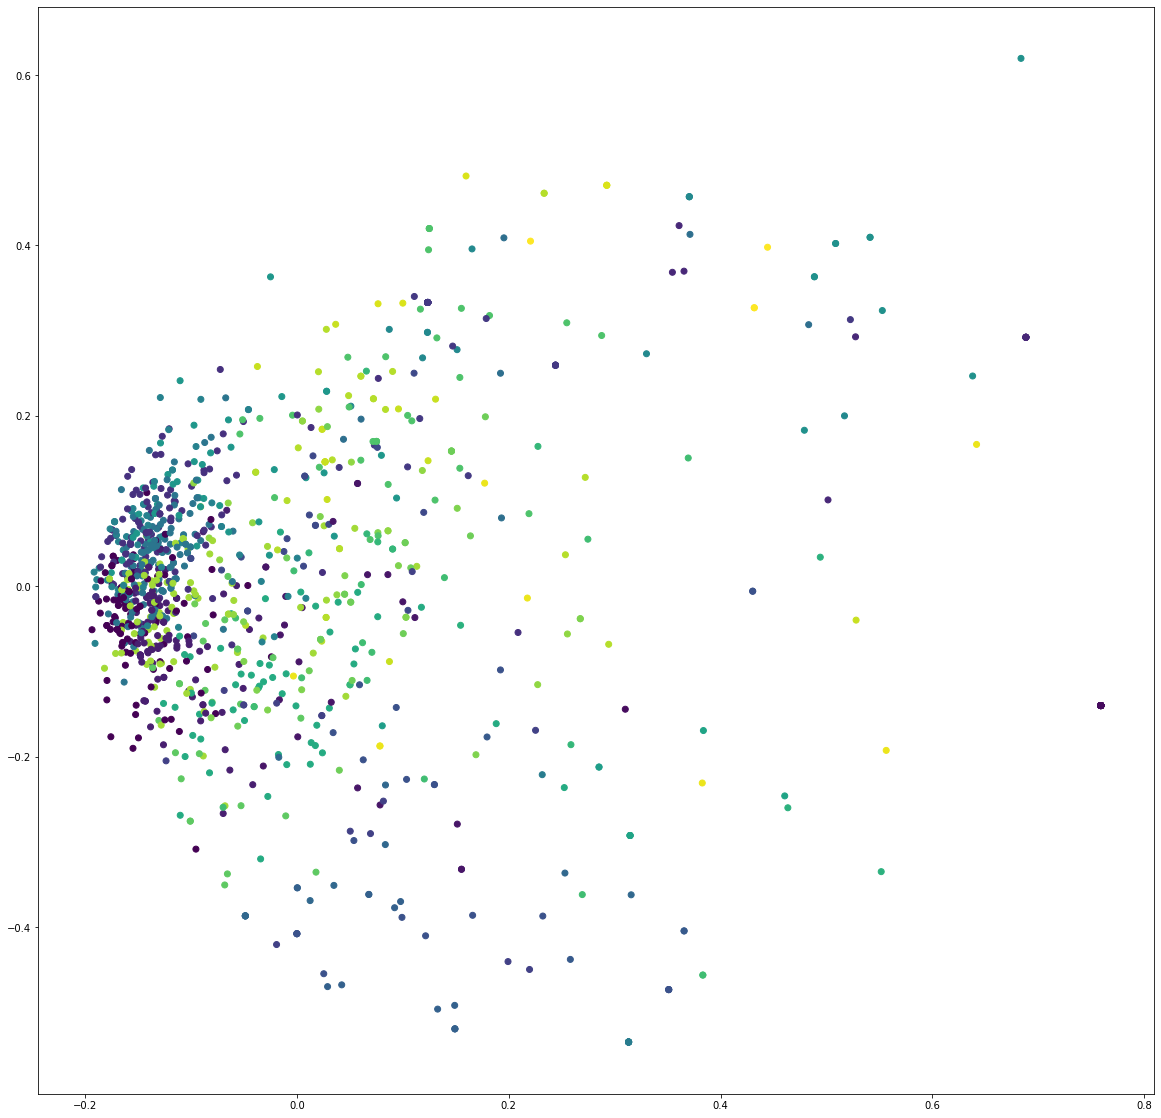

In [17]:
plt.figure(figsize=(20,20))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = kmeans_pred)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_train, kmeans.predict(X_train)))

              precision    recall  f1-score   support

           0       0.01      0.05      0.02        20
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        14
           3       0.04      0.33      0.07        12
           4       0.00      0.00      0.00        13
           5       0.06      0.10      0.07        59
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         7
           9       0.04      0.11      0.06         9
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         9
          14       0.01      0.14      0.01         7
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00         8
          17       0.00    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
dbs = DBSCAN()

In [21]:
dbs.fit(X_train)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [22]:
dbspr = dbs.fit_predict(X_train)

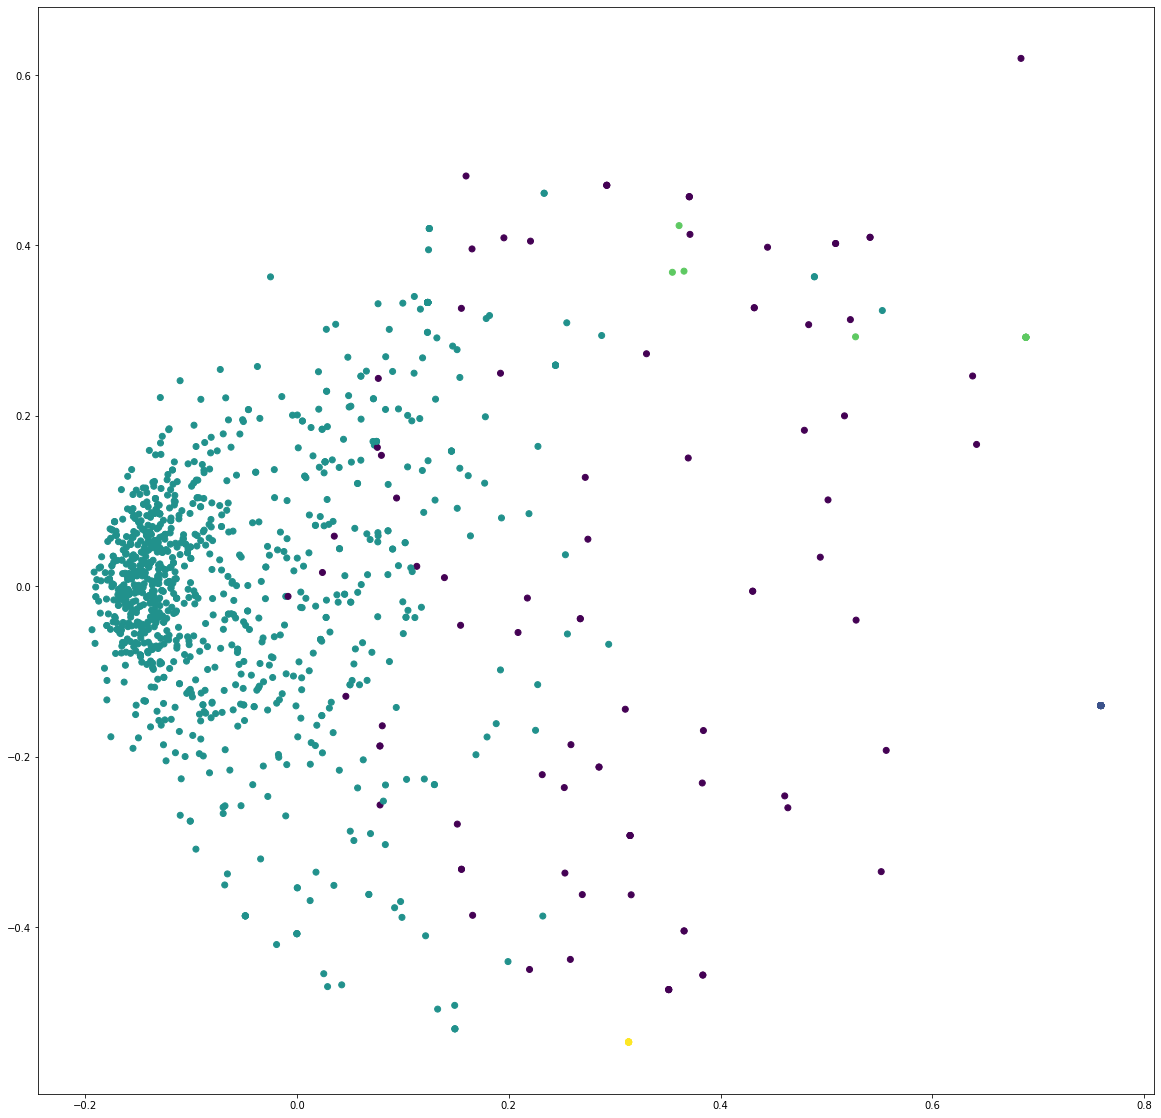

In [23]:
plt.figure(figsize=(20,20))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = dbspr)

In [24]:
mshift = MeanShift()

In [25]:
mshift.fit(X_train)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [26]:
pred_msh = mshift.fit_predict(X_train)

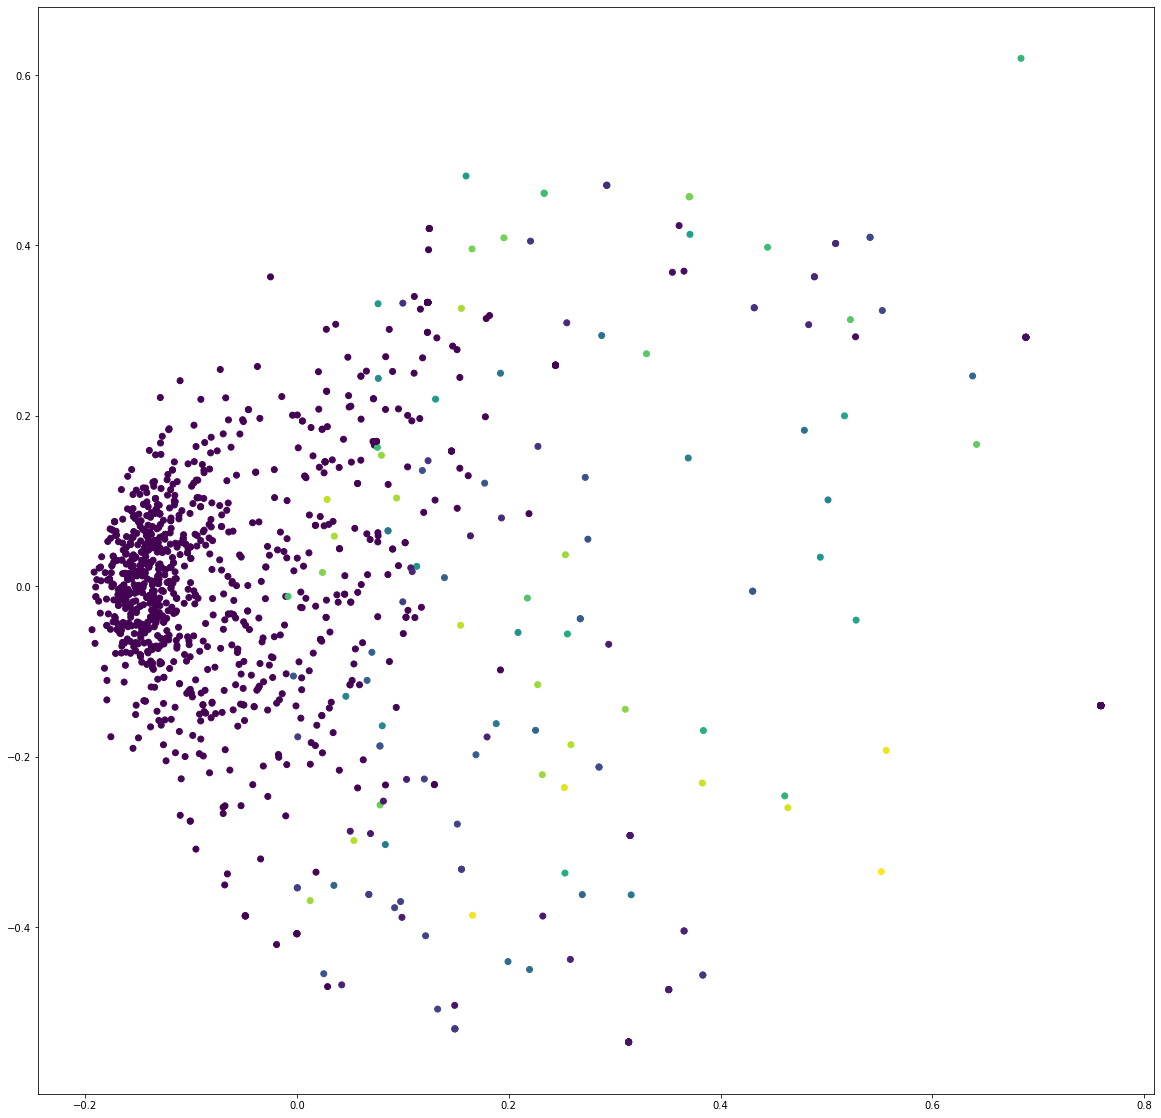

In [27]:
plt.figure(figsize=(20,20))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = pred_msh)